#Salary Discrimination
The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.
Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
Year. Number of years in current rank.
Degree. Highest degree. 1 for doctorate, 0 for master's.
YSdeg. Years since highest degree was earned.
Salary. Salary/year in dollars.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
dataset

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.dtypes

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
iqr = dataset['Year'].quantile(0.75) - dataset['Year'].quantile(0.25)
upper_threshold = dataset['Year'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Year'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(23.0, -9.0)

In [ ]:
dataset.Year=dataset.Year.clip(-9.0,23)

In [ ]:
iqr = dataset['YSdeg'].quantile(0.75) - dataset['YSdeg'].quantile(0.25)
upper_threshold = dataset['YSdeg'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['YSdeg'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(48.0, -18.0)

In [ ]:
dataset.shape

(52, 6)

In [ ]:
dataset

# EDA

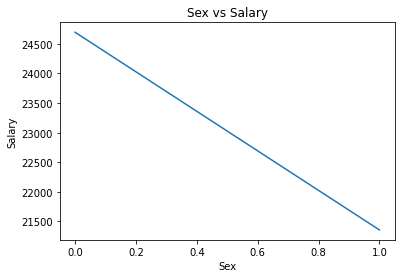

In [ ]:
dataset.groupby('Sex')['Salary'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [ ]:
dataset[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


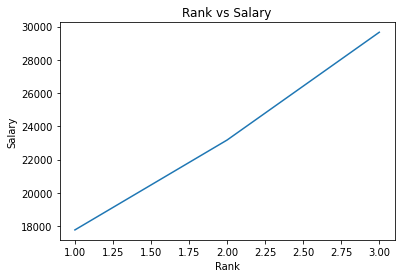

In [ ]:
dataset.groupby('Rank')['Salary'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [ ]:
dataset[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


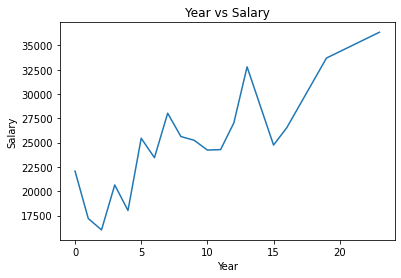

In [ ]:
dataset.groupby('Year')['Salary'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [ ]:
dataset[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


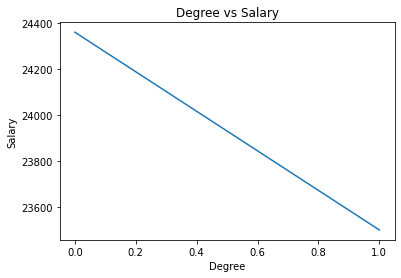

In [ ]:
dataset['transformed'] = np.power(dataset['Degree'],3) # transformation
dataset.groupby('Degree')['Salary'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [ ]:
dataset[['transformed','Salary']].corr()

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


1) There is no linear relationship between highways and consumption
2) Have tried all trasnformations - still not able to see a good linear relationship
3) Have decided to drop the feature

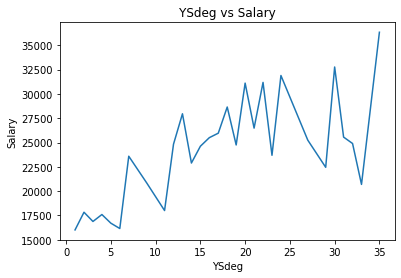

In [ ]:
dataset.groupby('YSdeg')['Salary'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [ ]:
dataset[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


# Preparing the Data

In [ ]:
dataset.head()

,Sex,Rank,Year,Degree,YSdeg,Salary,transformed
0,0,3,23.0,1,35,36350,1
1,0,3,13.0,1,22,35350,1
2,0,3,10.0,1,23,28200,1
3,1,3,7.0,1,27,26775,1
4,0,3,19.0,0,30,33696,0


In [ ]:
X = dataset[['Sex', 'Rank','Year', 'YSdeg']].values #array of features
y = dataset['Salary'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape, X_test.shape

((39, 4), (13, 4))

# Normalising/Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank',
       'Year', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# Salary = 474.922 *scaled_Sex + 4485.42 * Rank +  2640.38* scaled_Year + -566.88* scaled_YSdeg + 24217.76

,Coefficient
Sex,474.922835
Rank,4485.422650
Year,2640.385182
YSdeg,-566.887318


In [ ]:
regressor.intercept_ # c 

24217.76923076923

# Evaluation

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7974743847362715
